In [175]:
using XGPaint
using Healpix
using Printf
using Plots

# Check the queryDiscRing function in XGPaint
## Put a ring near the north pole (theta, phi) = (1.0, 120), paint a 5 degree ring

In [183]:
# --- Parameters you can tweak ---
nside  = 512
θ0     = deg2rad(1.0)     # colatitude (0 at North pole) in radians
ϕ0     = deg2rad(120.0)    # longitude in radians
θmax   = deg2rad(5.0)      # disc radius in radians
eps_ok = 1e-10             # small tolerance for floating-point checks

# --- Minimal workspace scratch objects (like in your workspace) ---
disc_buffer = Int[]                       # where pixel indices will be written
ringinfo    = RingInfo(0, 0, 0, 0.0, true)

RingInfo(0, 0, 0, 0.0, true)

In [184]:
# Build a HEALPix map (Ring ordering) to get a Resolution
hp_map = HealpixMap{Float64,RingOrder}(nside)
res    = hp_map.resolution                # XGPaint.queryDiscRing! will accept this

# --- Query pixels within the disc ---
empty!(disc_buffer)
XGPaint.queryDiscRing!(disc_buffer, ringinfo, res, θ0, ϕ0, θmax)

@printf "Found %d pixels in disc (θmax = %.3f deg)\n" length(disc_buffer) rad2deg(θmax)


Found 2375 pixels in disc (θmax = 5.000 deg)


## Paint and save the map, and then check using Healpy (python version)

In [190]:
# Build a mask map and mark queried pixels
m = HealpixMap{Float32,RingOrder}(nside)
fill!(m.pixels, 0.0)              # optional: unseen elsewhere
for ip in disc_buffer
    m[ip] = 1f0
end
m[ang2pix(m, θ0, ϕ0)] = 20f0         # optional: highlight the center pixel

# Mollweide projection via Healpix.jl's plot recipe

Healpix.saveToFITS(m, "!disc_mask_from_julia.fits", typechar="D")


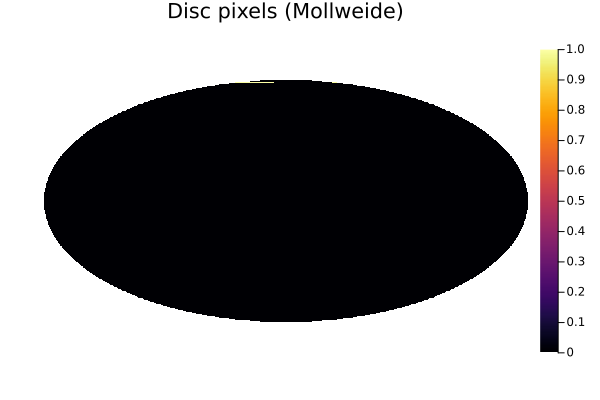

In [191]:
plot(m; title="Disc pixels (Mollweide)")